In [1]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=2.5,
                rc={"lines.linewidth": 2.5})
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [2]:
# Lectura de la BD
path = 'HR_attrition_orig_proc.csv'
data = pd.read_csv(path, sep = ';', dtype={'MaritalStatus':np.str,'Education':np.str,'EducationField':np.str,
                                           'BusinessTravel':np.str,'Education':np.str,'EducationField':np.str,
                                           'StockOptionLevel':np.str,'Department':np.str,'JobInvolvement':np.str},
                   na_filter= False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
Attrition                   1470 non-null int64
Age                         1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null object
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null int64
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null object
JobLevel                    1470 non-null int64
JobRole                     1470 non-null int64
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked     

In [4]:
data.head(20)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,0,1102,0,1,2,0,2,0,...,3,1,0,8,0,1,6,4,0,5
1,1,49,1,279,1,8,1,0,3,1,...,4,4,1,10,3,3,10,7,1,7
2,0,37,0,1373,1,2,2,1,4,1,...,3,2,0,7,3,3,0,0,0,0
3,1,33,1,1392,1,3,4,0,4,0,...,3,3,0,8,3,3,8,7,3,0
4,1,27,0,591,1,2,1,2,1,1,...,3,4,1,6,3,3,2,2,2,2
5,1,32,1,1005,1,2,2,0,4,1,...,3,3,0,8,2,2,7,7,3,6
6,1,59,0,1324,1,3,3,2,3,0,...,4,1,3,12,3,2,1,0,0,0
7,1,30,0,1358,1,24,1,0,4,1,...,4,2,1,1,2,3,1,0,0,0
8,1,38,1,216,1,23,3,0,4,1,...,4,2,0,10,2,3,9,7,1,8
9,1,36,0,1299,1,27,3,2,3,1,...,3,2,2,17,3,2,7,7,7,7


In [5]:
data['RelationshipSatisfaction'].unique()

array([1, 4, 2, 3], dtype=int64)

## 1. Análisis preliminar de los datos

In [6]:
data.describe()

,Attrition,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,Gender,HourlyRate,JobLevel,JobRole,JobSatisfaction,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.838776,36.923810,802.485714,9.192517,2.721769,0.600000,65.891156,2.063946,2.553061,2.728571,...,15.209524,3.153741,2.712245,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,0.367863,9.135373,403.509100,8.106864,1.093082,0.490065,20.329428,1.106940,2.323902,1.102846,...,3.659938,0.360824,1.081209,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,18.000000,102.000000,1.000000,1.000000,0.000000,30.000000,1.000000,0.000000,1.000000,...,11.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,30.000000,465.000000,2.000000,2.000000,0.000000,48.000000,1.000000,1.000000,2.000000,...,12.000000,3.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1.000000,36.000000,802.000000,7.000000,3.000000,1.000000,66.000000,2.000000,2.000000,3.000000,...,14.000000,3.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1.000000,43.000000,1157.000000,14.000000,4.000000,1.000000,83.750000,3.000000,4.000000,4.000000,...,18.000000,3.000000,4.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1.000000,60.000000,1499.000000,29.000000,4.000000,1.000000,100.000000,5.000000,8.000000,4.000000,...,25.000000,4.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Variable respuesta: Attrition

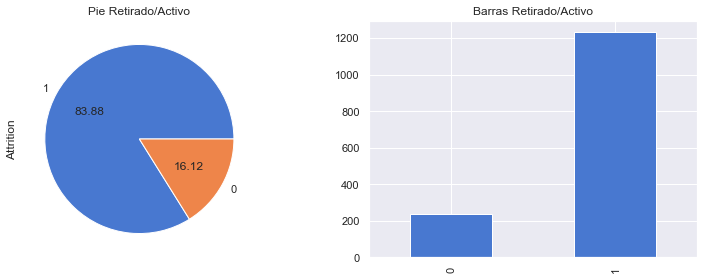

In [7]:
# Gráfico para variable respuesta
sns.set_context("notebook", font_scale=1.0,
                rc={"lines.linewidth": 2.5})

fig = plt.figure(figsize=(40,20))

plt.subplot2grid((4,3),(0,0))
plot = data['Attrition'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(20, 20),
                                            title='Pie Retirado/Activo')

plt.subplot2grid((4,3),(0,1))
plot = data['Attrition'].value_counts(sort = False).plot(kind='bar', title='Barras Retirado/Activo')

In [8]:
 conteos = data['Attrition'].value_counts()
 print(conteos)

1    1233
0     237
Name: Attrition, dtype: int64


### Subset de variables numéricas

In [9]:
# subset variables numéricas y attrition
subset = ['Attrition','Age','DailyRate','DistanceFromHome','MonthlyIncome',
                     'HourlyRate','PercentSalaryHike','TotalWorkingYears','MonthlyRate',
                     'TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole',
                     'YearsSinceLastPromotion','YearsWithCurrManager','NumCompaniesWorked']
subset = data[subset]
subset.shape

(1470, 15)

In [10]:
# comparativo de la media por cada nivel de la variable respuesta
subset.groupby('Attrition').mean()

,Age,DailyRate,DistanceFromHome,MonthlyIncome,HourlyRate,PercentSalaryHike,TotalWorkingYears,MonthlyRate,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NumCompaniesWorked
Attrition,,,,,,,,,,,,,,
0,33.607595,750.362869,10.632911,4787.092827,65.573840,15.097046,8.244726,14559.308017,2.624473,5.130802,2.902954,1.945148,2.852321,2.940928
1,37.561233,812.504461,8.915653,6832.739659,65.952149,15.231144,11.862936,14265.779400,2.832928,7.369019,4.484185,2.234388,4.367397,2.645580


In [11]:
subset_columns = subset.columns.values.tolist()
subset_columns

['Attrition',
 'Age',
 'DailyRate',
 'DistanceFromHome',
 'MonthlyIncome',
 'HourlyRate',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'MonthlyRate',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'NumCompaniesWorked']

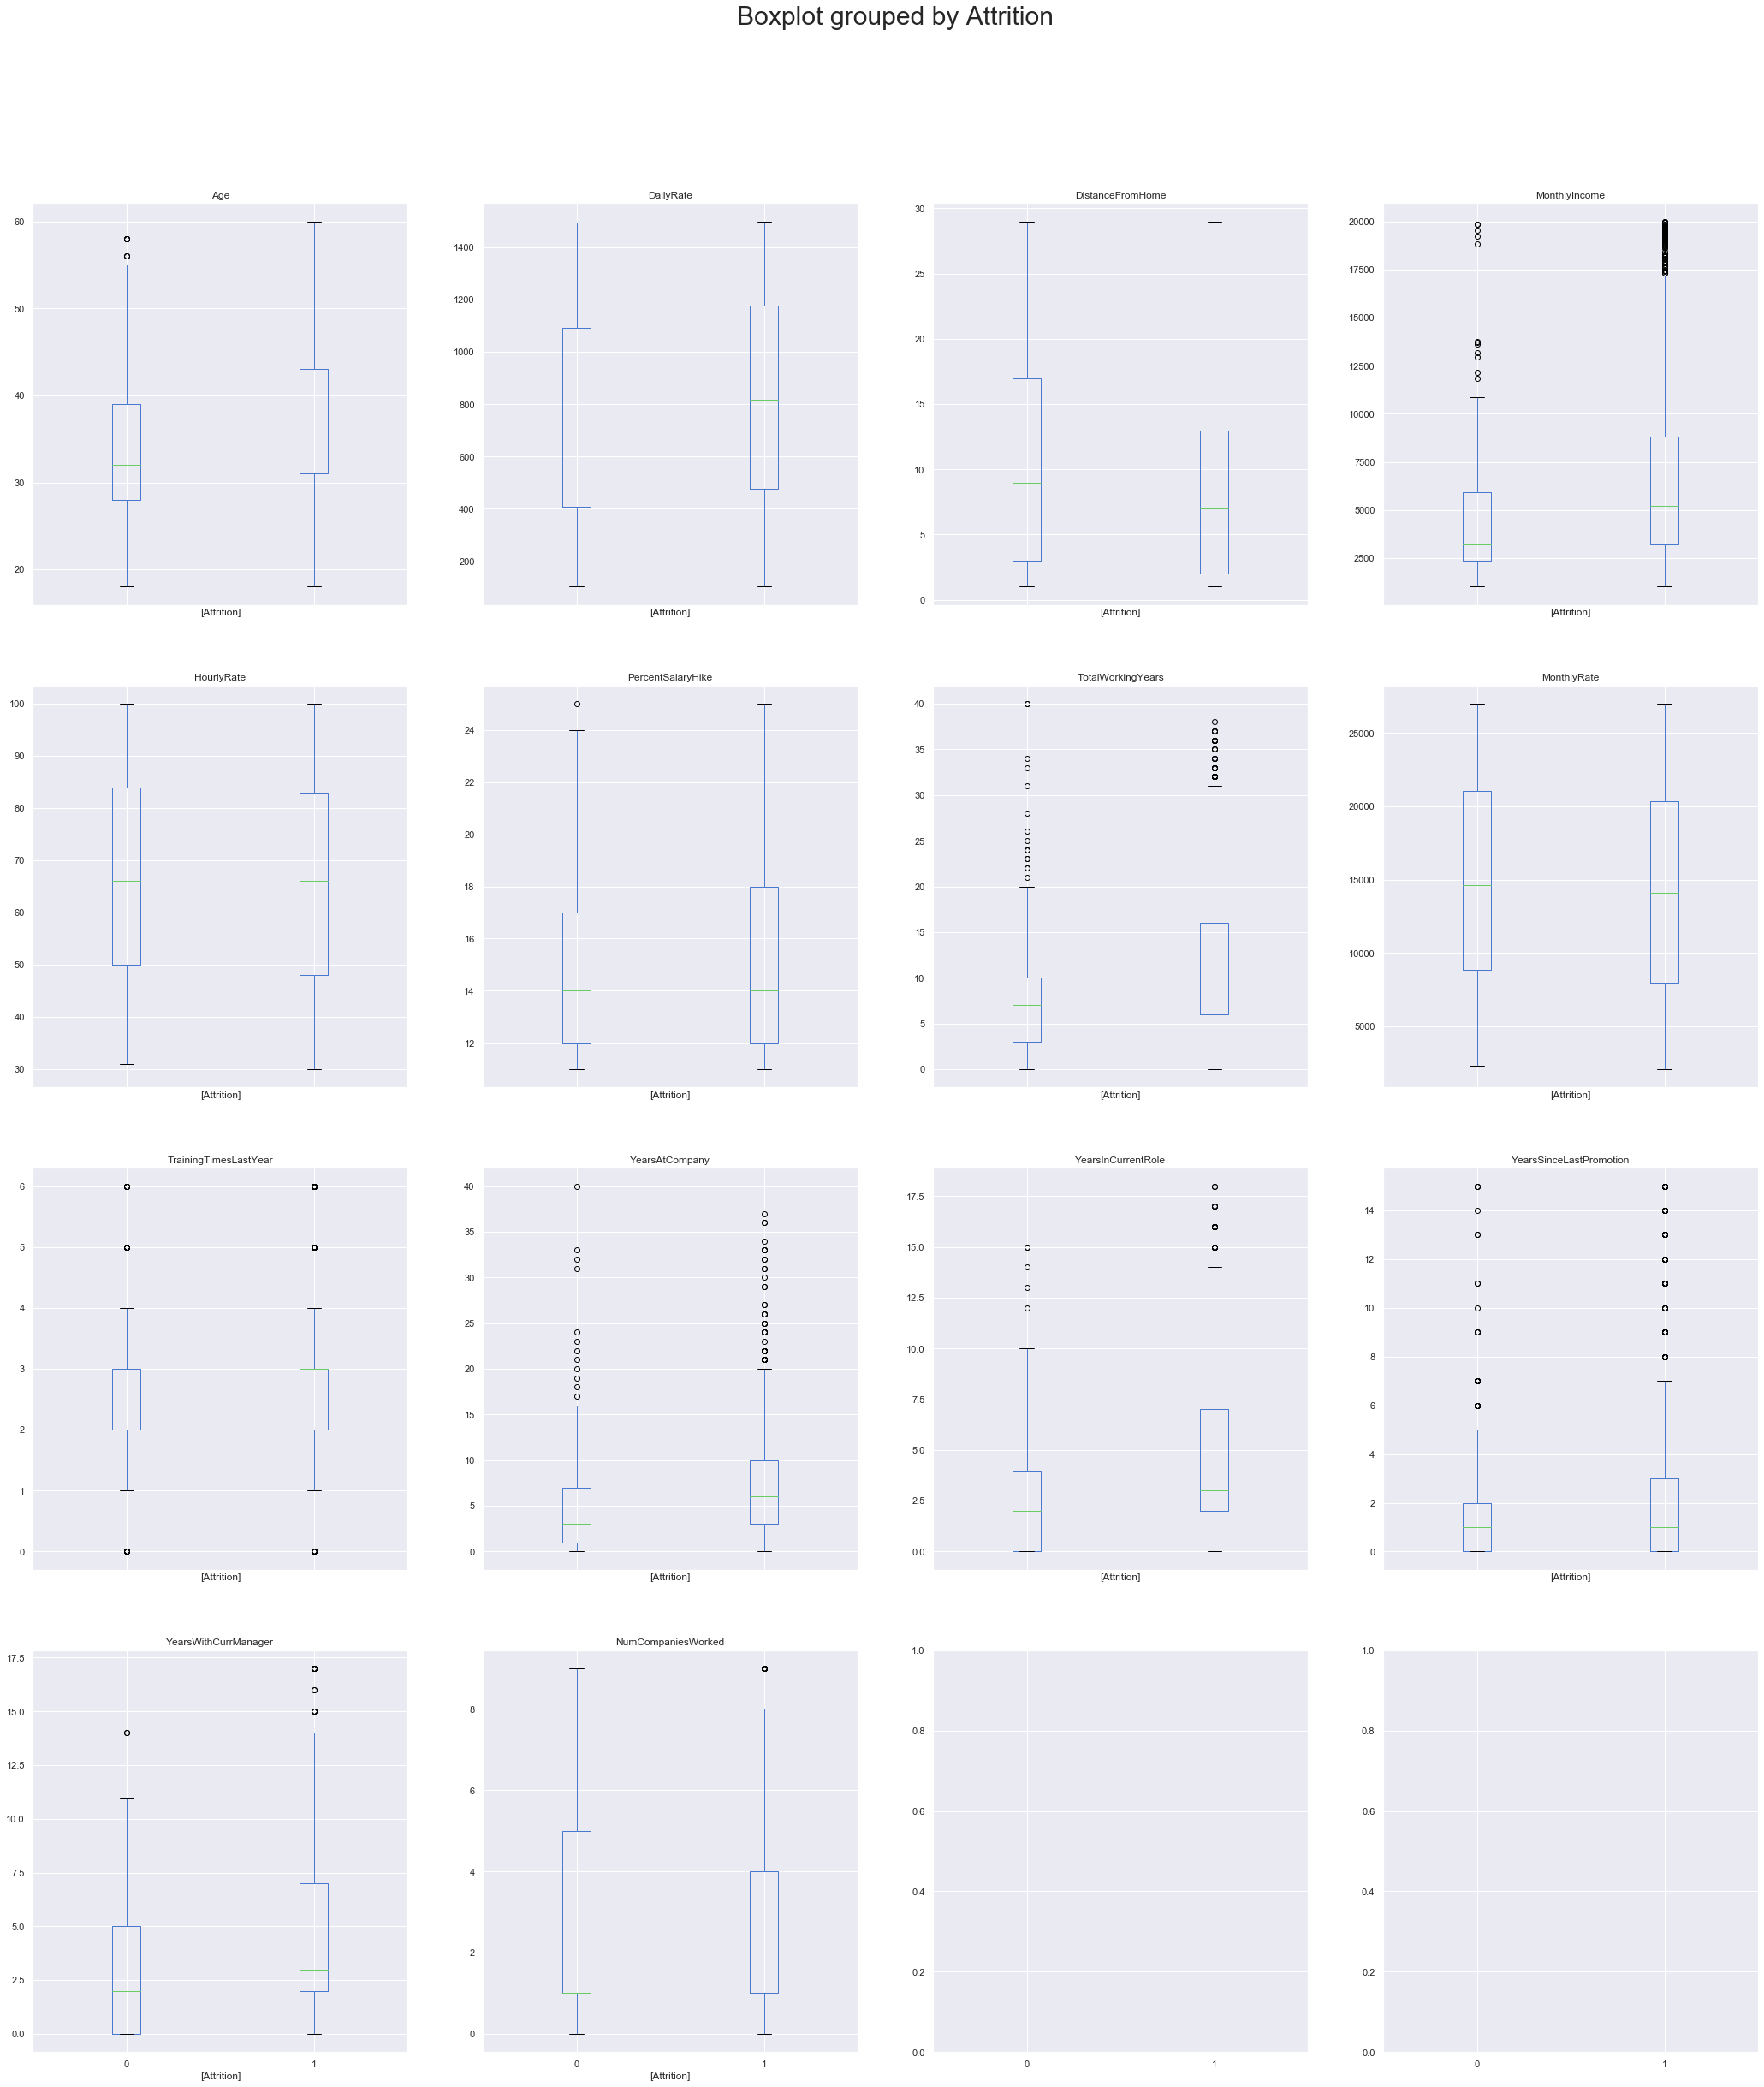

In [12]:
# Boxplot de las variables numéricas vs Attrition 

figure, axs = plt.subplots(4,4, sharey=False, sharex=True, figsize=(35,40))
plt.rcParams.update({'font.size': 25})


indice = 1
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        try:
            boxplot = data.boxplot(column=[subset_columns[indice]], return_type='axes', by=['Attrition'], ax=axs[i][j])
            indice += 1
        except IndexError:
            pass

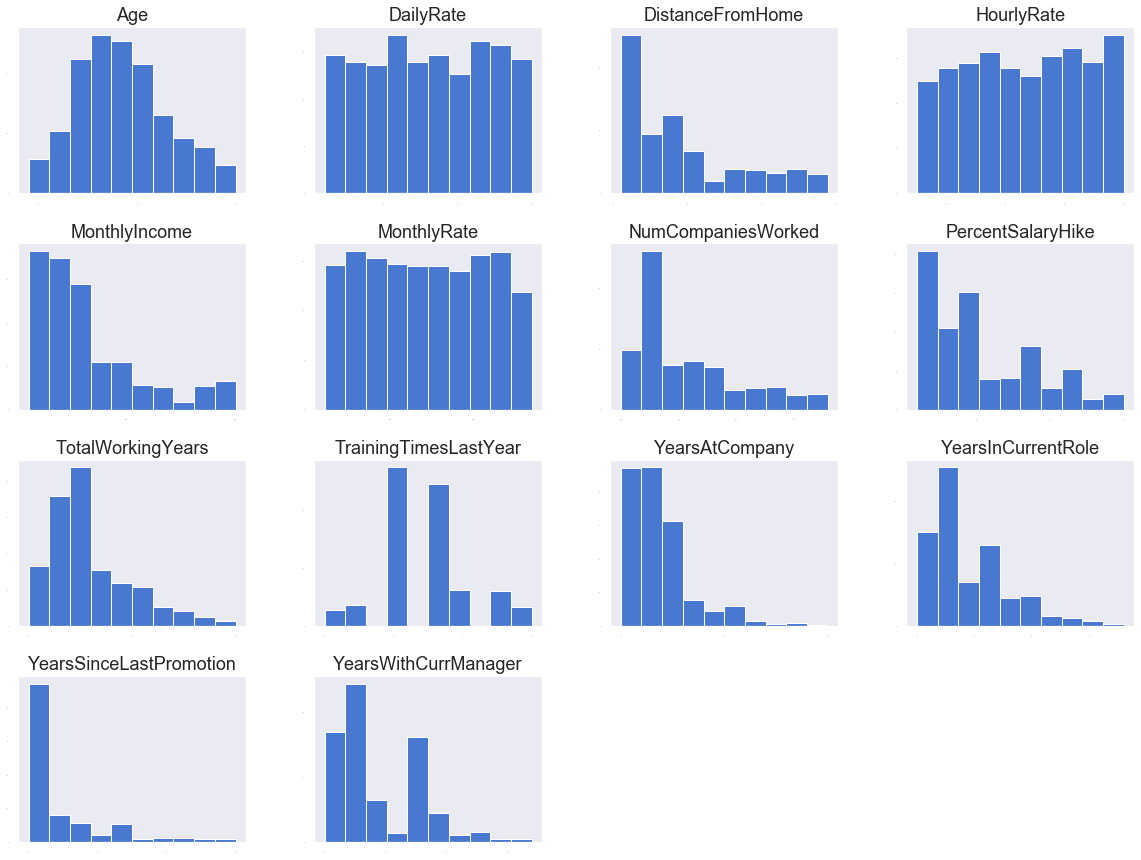

In [13]:
# Histograma de las variables numéricas
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
x_subset = subset.drop('Attrition', axis = 1)
x_subset.hist(grid=False, xlabelsize=0.5, ylabelsize=0.5, figsize=(20,15));

In [14]:
#Matriz de correlación entre variables numéricas
corr = x_subset.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,DailyRate,DistanceFromHome,MonthlyIncome,HourlyRate,PercentSalaryHike,TotalWorkingYears,MonthlyRate,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NumCompaniesWorked
Age,1,0.0106609,-0.00168612,0.497855,0.0242865,0.00363358,0.680381,0.0280512,-0.0196208,0.311309,0.212901,0.216513,0.202089,0.299635
DailyRate,0.0106609,1,-0.00498534,0.00770706,0.0233814,0.0227037,0.0145147,-0.0321816,0.00245254,-0.0340548,0.00993201,-0.033229,-0.0263632,0.0381534
DistanceFromHome,-0.00168612,-0.00498534,1,-0.0170144,0.0311306,0.0402354,0.00462843,0.0274729,-0.0369422,0.00950772,0.018845,0.0100288,0.014406,-0.0292508
MonthlyIncome,0.497855,0.00770706,-0.0170144,1,-0.0157943,-0.0272686,0.772893,0.0348136,-0.0217363,0.514285,0.363818,0.344978,0.344079,0.149515
HourlyRate,0.0242865,0.0233814,0.0311306,-0.0157943,1,-0.00906199,-0.00233368,-0.0152967,-0.00854769,-0.0195816,-0.0241062,-0.0267156,-0.0201232,0.0221569
PercentSalaryHike,0.00363358,0.0227037,0.0402354,-0.0272686,-0.00906199,1,-0.0206085,-0.00642935,-0.00522101,-0.0359913,-0.00152003,-0.0221543,-0.0119852,-0.0102383
TotalWorkingYears,0.680381,0.0145147,0.00462843,0.772893,-0.00233368,-0.0206085,1,0.0264425,-0.0356616,0.628133,0.460365,0.404858,0.459188,0.237639
MonthlyRate,0.0280512,-0.0321816,0.0274729,0.0348136,-0.0152967,-0.00642935,0.0264425,1,0.00146688,-0.0236551,-0.0128149,0.0015668,-0.0367459,0.0175214
TrainingTimesLastYear,-0.0196208,0.00245254,-0.0369422,-0.0217363,-0.00854769,-0.00522101,-0.0356616,0.00146688,1,0.00356867,-0.0057375,-0.00206654,-0.00409553,-0.0660541
YearsAtCompany,0.311309,-0.0340548,0.00950772,0.514285,-0.0195816,-0.0359913,0.628133,-0.0236551,0.00356867,1,0.758754,0.618409,0.769212,-0.118421


In [15]:
from statsmodels.graphics.mosaicplot import mosaic

In [16]:
all_total_coloumns = data.columns.values.tolist()
categoricas = [x for x in all_total_coloumns if x not in x_subset]
categoricas 

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance']

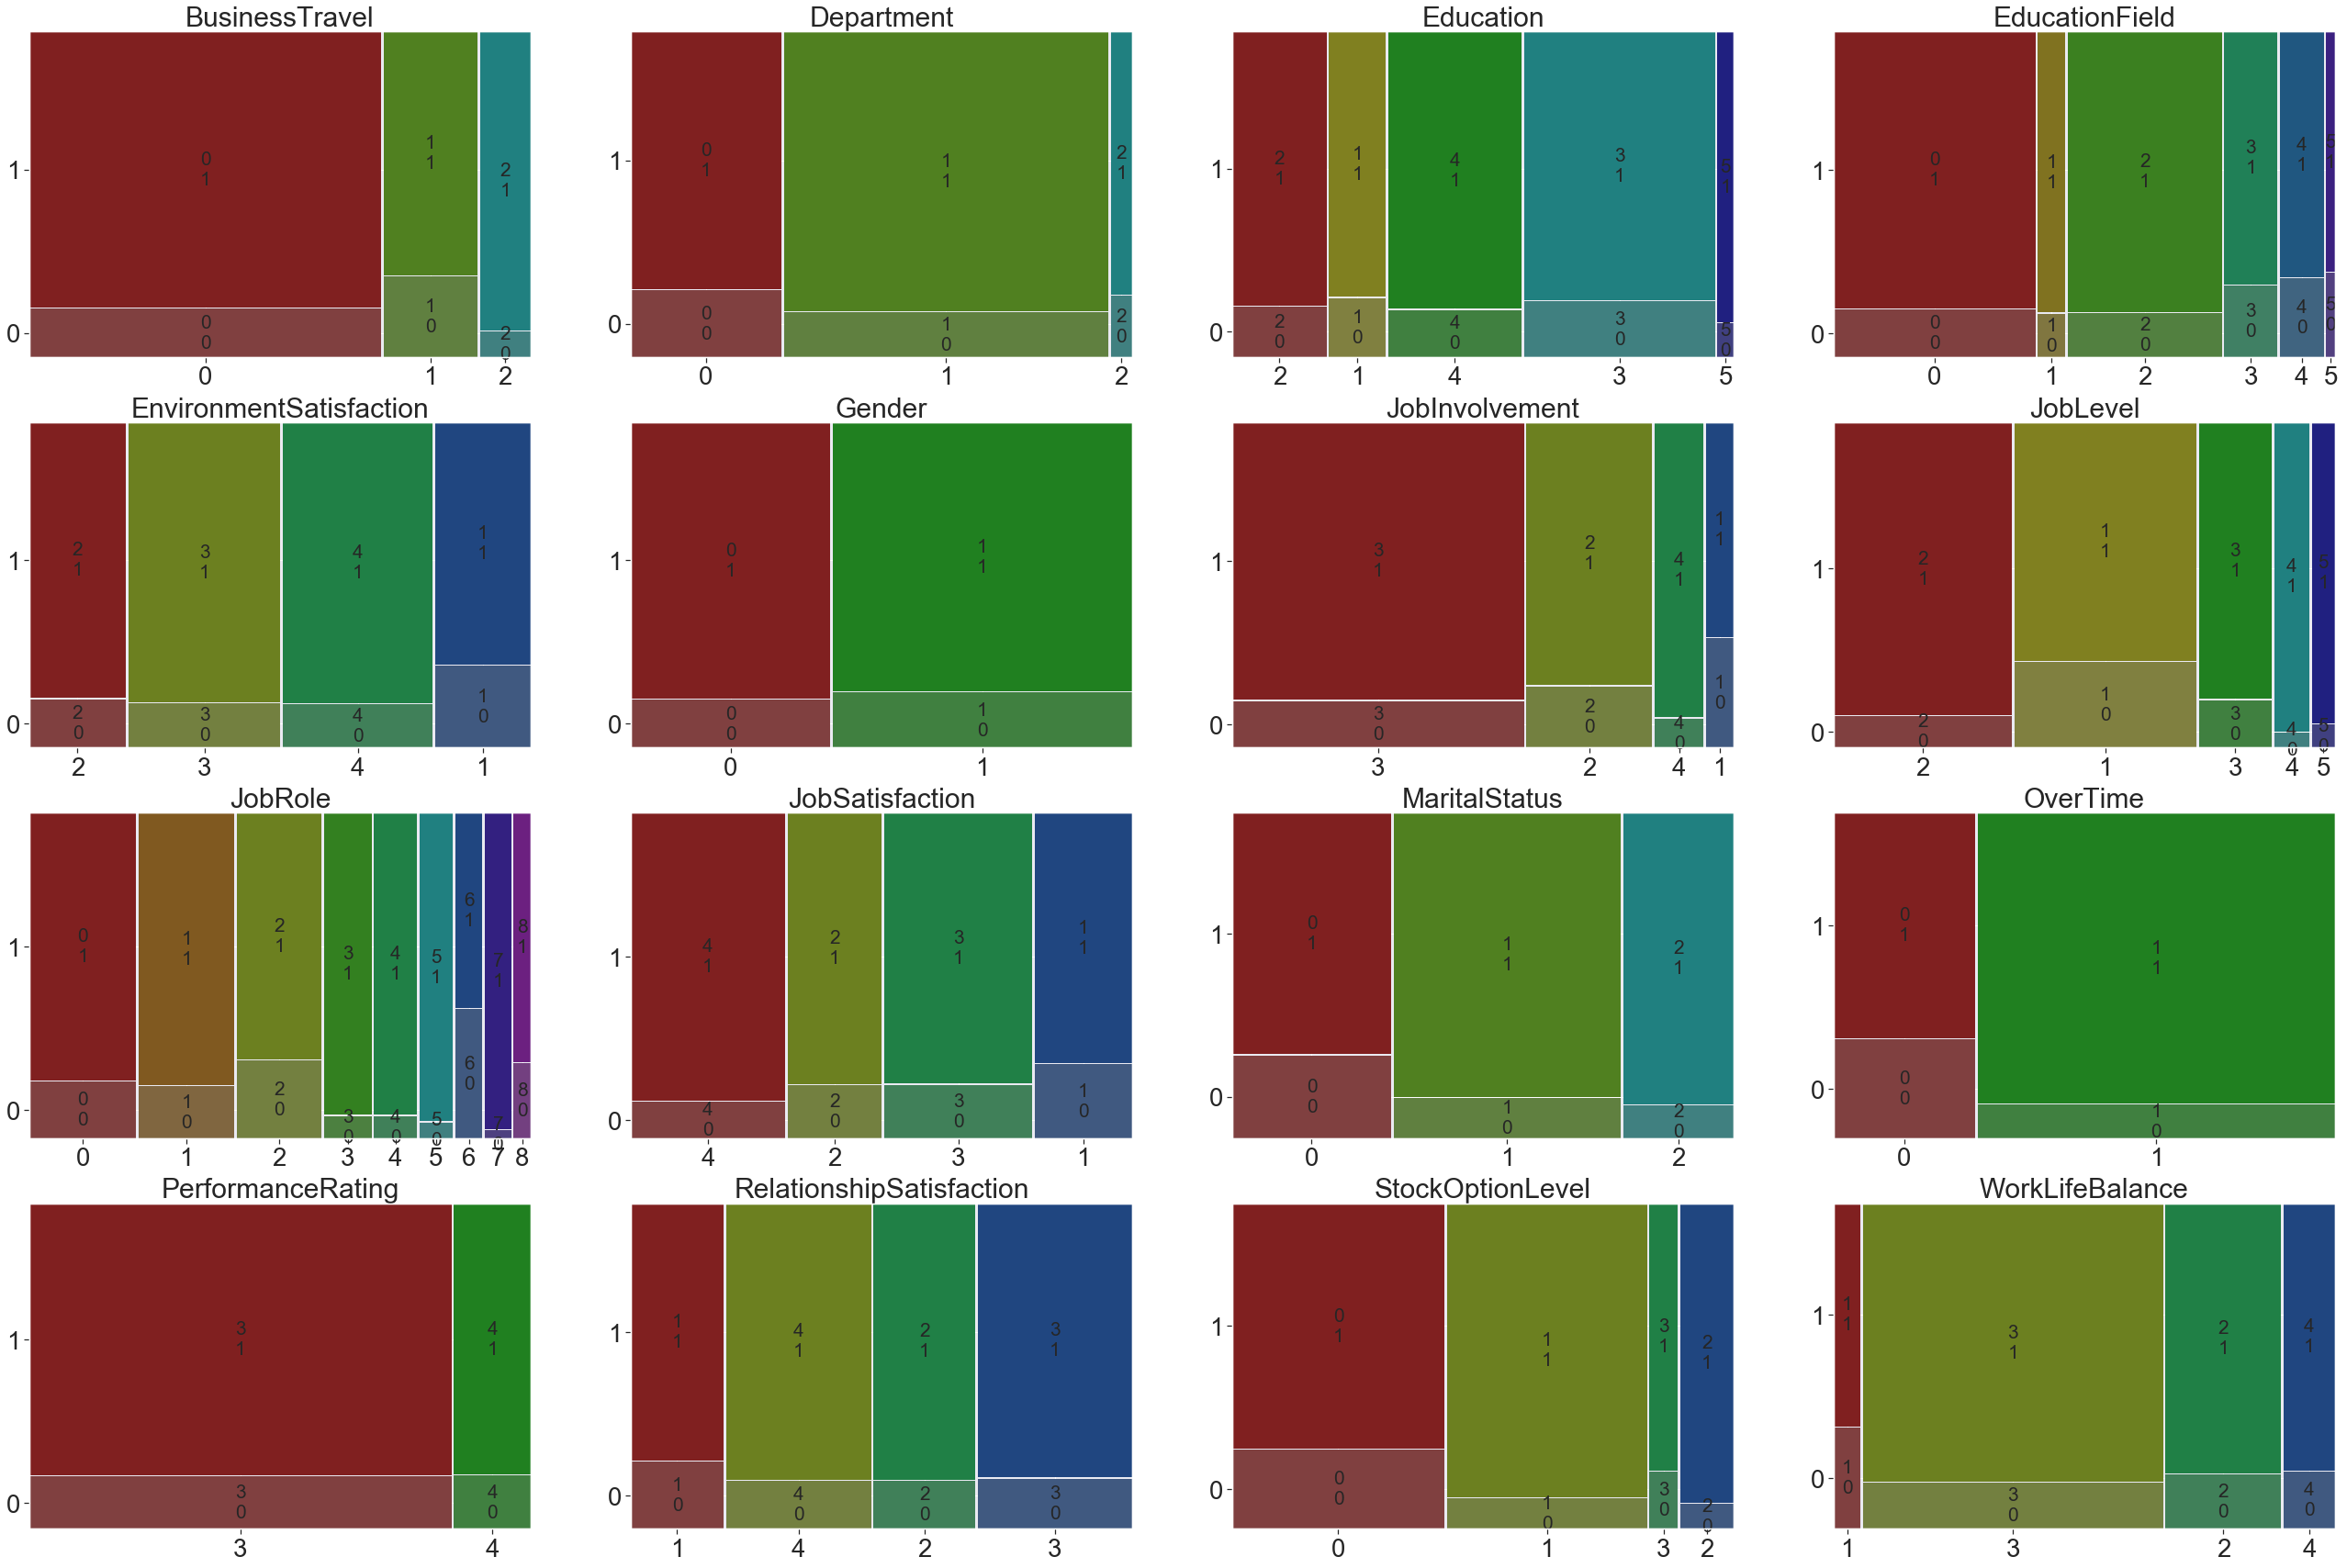

In [17]:
# Mosaic Plot de las variables categóricas vs Attrition 

sns.set_context("notebook", font_scale=2.5,
                rc={"lines.linewidth": 2.5})
figure, axs = plt.subplots(4,4, sharey=False, sharex=False, figsize=(45,30))
plt.rcParams.update({'font.size': 25})


indice = 1
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        try:
            mosaic(data, [categoricas[indice],'Attrition'],ax=axs[i][j], title=categoricas[indice], axes_label=True)
            
            indice += 1
        except IndexError:
            pass

### Conversión de las variables categóticas a Dummies

In [18]:
categories = data.select_dtypes(include=['object'])
categories_col = categories.columns.values.tolist()
categories_col

['BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'JobInvolvement',
 'MaritalStatus',
 'StockOptionLevel']

In [19]:
for category in categories:
    cat_name = 'cat_' + category
    cat_dummies = pd.get_dummies(data[category], prefix=cat_name)
    data_new = data.join(cat_dummies)
    data = data_new
    
data_new.head()    

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,cat_JobInvolvement_2,cat_JobInvolvement_3,cat_JobInvolvement_4,cat_MaritalStatus_0,cat_MaritalStatus_1,cat_MaritalStatus_2,cat_StockOptionLevel_0,cat_StockOptionLevel_1,cat_StockOptionLevel_2,cat_StockOptionLevel_3
0,0,41,0,1102,0,1,2,0,2,0,...,0,1,0,1,0,0,1,0,0,0
1,1,49,1,279,1,8,1,0,3,1,...,1,0,0,0,1,0,0,1,0,0
2,0,37,0,1373,1,2,2,1,4,1,...,1,0,0,1,0,0,1,0,0,0
3,1,33,1,1392,1,3,4,0,4,0,...,0,1,0,0,1,0,1,0,0,0
4,1,27,0,591,1,2,1,2,1,1,...,0,1,0,0,1,0,0,1,0,0


In [20]:
data_new.shape

(1470, 59)

In [21]:
data_vars = data_new.columns.values.tolist()
to_keep = (v for v in data_vars if v not in categories)

In [22]:
df = data_new[to_keep]
var_names = df.columns.values.tolist()
df.head()

,Attrition,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,Gender,HourlyRate,JobLevel,JobRole,JobSatisfaction,...,cat_JobInvolvement_2,cat_JobInvolvement_3,cat_JobInvolvement_4,cat_MaritalStatus_0,cat_MaritalStatus_1,cat_MaritalStatus_2,cat_StockOptionLevel_0,cat_StockOptionLevel_1,cat_StockOptionLevel_2,cat_StockOptionLevel_3
0,0,41,1102,1,2,0,94,2,0,4,...,0,1,0,1,0,0,1,0,0,0
1,1,49,279,8,3,1,61,2,1,2,...,1,0,0,0,1,0,0,1,0,0
2,0,37,1373,2,4,1,92,1,2,3,...,1,0,0,1,0,0,1,0,0,0
3,1,33,1392,3,4,0,56,1,1,3,...,0,1,0,0,1,0,1,0,0,0
4,1,27,591,2,1,1,40,1,2,2,...,0,1,0,0,1,0,0,1,0,0


In [23]:
df.to_csv('attrition_dummy.csv')

### Separación de los datos

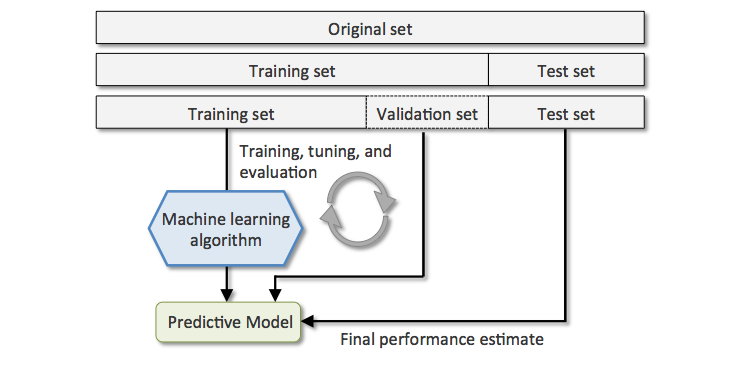

In [24]:
from IPython.display import Image
Image("https://i.stack.imgur.com/osBuF.png")

In [25]:
test_size = 0.4
df_train, df_test = train_test_split(df, test_size=test_size, random_state=42)

In [26]:
df_validate, df_test = train_test_split(df_test, test_size=0.5, random_state=42)

In [27]:
print(len(df_train), len(df_test), len(df_validate))

882 294 294


### Estandarización datos

In [28]:
X_train = df_train.drop("Attrition", axis = 1)
y_train = df_train["Attrition"]
X_test = df_test.drop("Attrition", axis = 1)
y_test = df_test["Attrition"]
X_validate = df_validate.drop("Attrition", axis = 1)
y_validate = df_validate["Attrition"]

In [29]:
col_names = X_train.columns.values.tolist()

In [30]:
num_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])

col_transformer = ColumnTransformer(transformers=[
    ('num', num_pipeline, col_names)
])

In [31]:
col_transformer.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('num',
                                 Pipeline(memory=None,
                                          steps=[('scaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True)),
                                                 ('imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='median',
                      

In [32]:
X_trained_scaled = pd.DataFrame(col_transformer.transform(X_train), index=X_train.index, columns = col_names)
X_test_scaled = pd.DataFrame(col_transformer.transform(X_test), index=X_test.index, columns = col_names)
X_validate_scaled = pd.DataFrame(col_transformer.transform(X_validate), index=X_validate.index, columns = col_names)

In [33]:
X_trained_scaled.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,Gender,HourlyRate,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,...,cat_JobInvolvement_2,cat_JobInvolvement_3,cat_JobInvolvement_4,cat_MaritalStatus_0,cat_MaritalStatus_1,cat_MaritalStatus_2,cat_StockOptionLevel_0,cat_StockOptionLevel_1,cat_StockOptionLevel_2,cat_StockOptionLevel_3
442,-0.103732,-0.389747,0.065235,-0.613163,0.820746,-1.740899,0.883731,-1.117847,1.183553,0.764844,...,-0.602673,0.830455,-0.317999,1.462460,-0.923548,-0.532769,1.179086,-0.828507,-0.341256,-0.274972
319,-0.529275,-0.504395,-0.179084,0.295761,-1.218403,-0.111724,-0.010135,-1.117847,-0.638251,-0.230890,...,1.659274,-1.204159,-0.317999,-0.683779,1.082781,-0.532769,1.179086,-0.828507,-0.341256,-0.274972
772,2.023983,1.086043,-0.056925,-1.522088,-1.218403,-0.210462,-0.904000,-0.688430,0.272651,-0.709899,...,-0.602673,0.830455,-0.317999,-0.683779,1.082781,-0.532769,-0.848115,1.206990,-0.341256,-0.274972
1053,2.130369,-0.950791,-1.034202,-0.613163,0.820746,1.270607,-0.010135,-0.688430,0.272651,-0.299620,...,-0.602673,-1.204159,3.144660,-0.683779,1.082781,-0.532769,-0.848115,1.206990,-0.341256,-0.274972
424,2.130369,-1.426458,2.386268,-1.522088,0.820746,-0.556044,1.777596,1.029237,1.183553,1.631921,...,1.659274,-1.204159,-0.317999,-0.683779,-0.923548,1.876986,-0.848115,1.206990,-0.341256,-0.274972


In [34]:
X_test_scaled.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,Gender,HourlyRate,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,...,cat_JobInvolvement_2,cat_JobInvolvement_3,cat_JobInvolvement_4,cat_MaritalStatus_0,cat_MaritalStatus_1,cat_MaritalStatus_2,cat_StockOptionLevel_0,cat_StockOptionLevel_1,cat_StockOptionLevel_2,cat_StockOptionLevel_3
290,1.279283,-0.387307,0.065235,0.295761,-1.218403,-1.592792,2.671461,1.888071,-1.549154,2.584700,...,-0.602673,0.830455,-0.317999,1.462460,-0.923548,-0.532769,1.179086,-0.828507,-0.341256,-0.274972
316,1.279283,0.722584,-1.034202,0.295761,-1.218403,1.122500,1.777596,0.599820,0.272651,1.599652,...,1.659274,-1.204159,-0.317999,1.462460,-0.923548,-0.532769,1.179086,-0.828507,-0.341256,-0.274972
88,-0.742047,-1.236191,-0.912042,0.295761,0.820746,1.566820,-0.010135,0.599820,1.183553,-0.456356,...,1.659274,-1.204159,-0.317999,-0.683779,1.082781,-0.532769,-0.848115,-0.828507,-0.341256,3.636730
631,0.747354,0.466455,-0.179084,-1.522088,0.820746,-0.259831,-0.904000,-0.259013,1.183553,-0.735882,...,-0.602673,-1.204159,3.144660,-0.683779,1.082781,-0.532769,-0.848115,1.206990,-0.341256,-0.274972
1093,0.534582,-1.236191,-0.912042,1.204685,0.820746,-1.345947,0.883731,0.599820,1.183553,0.795018,...,-0.602673,0.830455,-0.317999,-0.683779,1.082781,-0.532769,-0.848115,1.206990,-0.341256,-0.274972


In [35]:
X_validate_scaled.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,Gender,HourlyRate,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,...,cat_JobInvolvement_2,cat_JobInvolvement_3,cat_JobInvolvement_4,cat_MaritalStatus_0,cat_MaritalStatus_1,cat_MaritalStatus_2,cat_StockOptionLevel_0,cat_StockOptionLevel_1,cat_StockOptionLevel_2,cat_StockOptionLevel_3
1037,0.853740,1.593422,2.386268,-0.613163,0.820746,-0.605413,0.883731,0.170404,1.183553,0.639120,...,-0.602673,0.830455,-0.317999,-0.683779,1.082781,-0.532769,-0.848115,-0.828507,2.930351,-0.274972
1344,0.002654,-0.028727,-0.301244,1.204685,0.820746,0.530072,-0.010135,-0.688430,-1.549154,-0.428696,...,-0.602673,0.830455,-0.317999,-0.683779,1.082781,-0.532769,-0.848115,1.206990,-0.341256,-0.274972
706,0.321811,1.669041,1.775470,-0.613163,-1.218403,1.616189,1.777596,-1.117847,-0.638251,1.438306,...,-0.602673,-1.204159,3.144660,1.462460,-0.923548,-0.532769,1.179086,-0.828507,-0.341256,-0.274972
425,1.385668,0.742099,2.386268,-0.613163,0.820746,1.023762,1.777596,1.029237,0.272651,2.245454,...,1.659274,-1.204159,-0.317999,-0.683779,1.082781,-0.532769,-0.848115,1.206990,-0.341256,-0.274972
589,-0.848432,0.024938,-1.034202,-0.613163,-1.218403,-1.543423,-0.904000,-0.259013,-1.549154,-0.840443,...,1.659274,-1.204159,-0.317999,-0.683779,1.082781,-0.532769,-0.848115,1.206990,-0.341256,-0.274972


### Feature selection

In [36]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.feature_selection import SelectFromModel

In [37]:
sel = RFECV(estimator=LogisticRegression(solver='liblinear'), cv=5, scoring='accuracy')
sel.fit(X_trained_scaled, y_train)


RFECV(cv=5,
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='warn', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='liblinear', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [38]:
sel.get_support()

array([ True, False,  True,  True,  True, False, False, False,  True,
        True, False,  True,  True, False, False,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True, False, False, False,  True, False, False,  True, False,
        True, False,  True, False,  True,  True, False,  True,  True,
       False,  True,  True, False, False,  True])

In [39]:
# let's add the variable names and order it for clearer visualisation
selected_feat = X_trained_scaled.columns[(sel.get_support())]
len(selected_feat)

29

In [40]:
# let's display the list of features
selected_feat

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'Gender',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'RelationshipSatisfaction', 'TotalWorkingYears', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'cat_BusinessTravel_1', 'cat_BusinessTravel_2',
       'cat_Department_1', 'cat_Education_3', 'cat_EducationField_0',
       'cat_EducationField_2', 'cat_EducationField_4', 'cat_JobInvolvement_1',
       'cat_JobInvolvement_2', 'cat_JobInvolvement_4', 'cat_MaritalStatus_0',
       'cat_MaritalStatus_2', 'cat_StockOptionLevel_0',
       'cat_StockOptionLevel_3'],
      dtype='object')

### Lasso regularization

In [41]:
sel = SelectFromModel(LogisticRegression(C=1.5, penalty='l1'))
RL = sel.fit(X_train, y_train)

In [42]:
# this command let's me visualise those features that were kept
sel.get_support()

array([False, False, False,  True,  True, False,  True, False,  True,
       False, False,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True, False,  True])

In [43]:
# Now I make a list with the selected features
selected_feat2 = X_train.columns[(sel.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat2)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel.estimator_.coef_ == 0)))

total features: 51
selected features: 36
features with coefficients shrank to zero: 0


In [44]:
# let's display the list of features
selected_feat2

Index(['EnvironmentSatisfaction', 'Gender', 'JobLevel', 'JobSatisfaction',
       'NumCompaniesWorked', 'OverTime', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'cat_BusinessTravel_0', 'cat_BusinessTravel_1',
       'cat_BusinessTravel_2', 'cat_Department_0', 'cat_Department_2',
       'cat_Education_2', 'cat_Education_3', 'cat_Education_4',
       'cat_Education_5', 'cat_EducationField_0', 'cat_EducationField_2',
       'cat_EducationField_3', 'cat_EducationField_4', 'cat_EducationField_5',
       'cat_JobInvolvement_1', 'cat_JobInvolvement_2', 'cat_JobInvolvement_4',
       'cat_MaritalStatus_0', 'cat_MaritalStatus_1', 'cat_StockOptionLevel_0',
       'cat_StockOptionLevel_1', 'cat_StockOptionLevel_3'],
      dtype='object')

### GridSearch - Modelos clasificación



In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
import datetime as dt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import neighbors
from sklearn.gaussian_process import GaussianProcessClassifier

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_curve, auc,roc_auc_score, classification_report, f1_score


C:\Users\Juan Camilo Ceballos\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [46]:
models = {
            'linear' : {
                    'mod' : LogisticRegression(solver = 'saga'),
                    'par' : {'penalty' : ('l1','l2','elasticnet','none'),
                                'C': [1,1.5,2],
                            'l1_ratio':[0.2,0.5,0.8]}
                    },                     
            'gradient' : {
                    'mod' : GradientBoostingClassifier(warm_start = True),
                    'par' : {'loss' : ('deviance', 'exponential'),
                             'max_depth' : [3, 4, 5, 6, 7]}
                        },
           'tree':{'mod': DecisionTreeClassifier(),
                     'par':{'splitter':('best','random'),
                            'max_depth': [None, 2,4,6],
                            'min_samples_leaf':[1,5,8]}},
            'svm' : {
                    'mod' : svm.SVC(probability=True),
                    'par' : {'kernel' : ( 'linear', 'rbf')}
                    },
        'RandomForest' : {
                    'mod' : RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4, criterion = 'gini'),
                    'par' : {'max_depth' :[None, 2,4,6],
                            'min_samples_leaf':[1,5,8]}
                        },
        'Knn' : {
                    'mod' : neighbors.KNeighborsClassifier(),
                    'par' : {'n_neighbors' :[5, 10, 15],
                            'leaf_size':[15,25,30]}
                        },
        'GCP' : {
                    'mod' : GaussianProcessClassifier(),
                    'par' : {'optimizer' :['fmin_l_bfgs_b'],
                            }
                        }  
    
        }


In [47]:
def grid(x_name,n_proc, os_X_tt, os_Y_tt, X_test, y_test,  models, score = 'roc_auc', cv = 5):
    
    # Gridsearch
    
    result = dict()
    bestmodels = models.copy()
    for name in models:
        print('*'*80)
        print("Model: " + name)
        t_beg = time.time()

        pipeline = Pipeline([(name,  bestmodels[name]['mod'])])          
        parameters = {}          
        for par in bestmodels[name]['par']:
            aux = name + '__' +  par
            parameters[aux] = bestmodels[name]['par'][par]    
        aux = GridSearchCV(pipeline, parameters, n_jobs = n_proc,\
                          scoring = score, verbose=2, cv = cv)
        
        print(os_X_tt.columns.values)
        
        aux.fit(os_X_tt, os_Y_tt)
        y_true, y_pred = y_test , aux.predict(X_test)
        
        precision = precision_score(y_test, y_pred, average="macro")
        recall = recall_score(y_test, y_pred, average="macro")  
        auc = roc_auc_score(y_test, y_pred, average="macro")
        f1score = f1_score(y_test, y_pred, average="macro")
        
        
        bestmodels[name]['bestModel'] = aux.best_estimator_
        bestmodels[name][score] = aux.best_score_
        bestmodels[name]['cols_order'] = os_X_tt.columns.values
        selection_time = time.time() - t_beg

        bestmodels[name]['selection_time'] = selection_time

        sample_f_path = f'modelos/{x_name}' + f'{name}_{dt.datetime.now().strftime("%Y%m%d-%H%M")}.sav'

        print(f"Saving model at {sample_f_path}")    
        joblib.dump(bestmodels[name]['bestModel'], sample_f_path)

        print(f"El tiempo de seleccion fue: {selection_time:0.3f} s")
        print(f"El error {score} de la familia {name} es: {bestmodels[name][score]:0.3f}")
        print('*'*80)
    
        result[name] = {"auc": round(auc,3), "precision": round(precision,3), "recall": round(recall,3),"f1score": round(f1score,3)}
        
        
    mod_name = None
    best_mae = -np.inf
    for name in models:
        if bestmodels[name][score] > best_mae:
            mod_name = name
            best_mae = bestmodels[name][score]

    print(f"best model: " + mod_name + f" with an error {score} of: " + str(best_mae))
    
    return bestmodels, result

In [48]:
#Bestmodels

def get_max(dictionary, key_val):
    auc_list = []
    auc_dict = {}

    for key in dictionary:
        for key2 in dictionary[key]:
            if key_val in key2:
                auc_list.append(dictionary[key][key_val])

    max_key = ''
    max_val = max(auc_list)

    for key in dictionary:
        for key2 in dictionary[key]:
            if max_val == dictionary[key][key_val]:
                max_key = key
                
    return max_key, max_val

In [49]:
# variables seleccionadas
X1_train= X_trained_scaled[selected_feat]
X1_test = X_test_scaled[selected_feat]
X1_validate = X_validate_scaled[selected_feat]

X2_train= X_trained_scaled[selected_feat2]
X2_test = X_test_scaled[selected_feat2]
X2_validate = X_validate_scaled[selected_feat2]

### Con variables seleccionadas por RFECV

In [50]:
Bestmodels_X1, result_X1  = grid('X1', -1, X1_train, y_train.values, X1_test, y_test, models, score = 'roc_auc', cv = 5)

********************************************************************************
Model: linear
['Age' 'DistanceFromHome' 'EnvironmentSatisfaction' 'Gender'
 'JobSatisfaction' 'MonthlyIncome' 'NumCompaniesWorked' 'OverTime'
 'RelationshipSatisfaction' 'TotalWorkingYears' 'WorkLifeBalance'
 'YearsAtCompany' 'YearsInCurrentRole' 'YearsSinceLastPromotion'
 'YearsWithCurrManager' 'cat_BusinessTravel_1' 'cat_BusinessTravel_2'
 'cat_Department_1' 'cat_Education_3' 'cat_EducationField_0'
 'cat_EducationField_2' 'cat_EducationField_4' 'cat_JobInvolvement_1'
 'cat_JobInvolvement_2' 'cat_JobInvolvement_4' 'cat_MaritalStatus_0'
 'cat_MaritalStatus_2' 'cat_StockOptionLevel_0' 'cat_StockOptionLevel_3']
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    7.4s finished
C:\Users\Juan Camilo Ceballos\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


Saving model at modelos/X1linear_20200417-1824.sav
El tiempo de seleccion fue: 7.570 s
El error roc_auc de la familia linear es: 0.835
********************************************************************************
********************************************************************************
Model: gradient
['Age' 'DistanceFromHome' 'EnvironmentSatisfaction' 'Gender'
 'JobSatisfaction' 'MonthlyIncome' 'NumCompaniesWorked' 'OverTime'
 'RelationshipSatisfaction' 'TotalWorkingYears' 'WorkLifeBalance'
 'YearsAtCompany' 'YearsInCurrentRole' 'YearsSinceLastPromotion'
 'YearsWithCurrManager' 'cat_BusinessTravel_1' 'cat_BusinessTravel_2'
 'cat_Department_1' 'cat_Education_3' 'cat_EducationField_0'
 'cat_EducationField_2' 'cat_EducationField_4' 'cat_JobInvolvement_1'
 'cat_JobInvolvement_2' 'cat_JobInvolvement_4' 'cat_MaritalStatus_0'
 'cat_MaritalStatus_2' 'cat_StockOptionLevel_0' 'cat_StockOptionLevel_3']
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   14.4s finished


Saving model at modelos/X1gradient_20200417-1824.sav
El tiempo de seleccion fue: 15.190 s
El error roc_auc de la familia gradient es: 0.810
********************************************************************************
********************************************************************************
Model: tree
['Age' 'DistanceFromHome' 'EnvironmentSatisfaction' 'Gender'
 'JobSatisfaction' 'MonthlyIncome' 'NumCompaniesWorked' 'OverTime'
 'RelationshipSatisfaction' 'TotalWorkingYears' 'WorkLifeBalance'
 'YearsAtCompany' 'YearsInCurrentRole' 'YearsSinceLastPromotion'
 'YearsWithCurrManager' 'cat_BusinessTravel_1' 'cat_BusinessTravel_2'
 'cat_Department_1' 'cat_Education_3' 'cat_EducationField_0'
 'cat_EducationField_2' 'cat_EducationField_4' 'cat_JobInvolvement_1'
 'cat_JobInvolvement_2' 'cat_JobInvolvement_4' 'cat_MaritalStatus_0'
 'cat_MaritalStatus_2' 'cat_StockOptionLevel_0' 'cat_StockOptionLevel_3']
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    5.0s finished
C:\Users\Juan Camilo Ceballos\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Saving model at modelos/X1tree_20200417-1824.sav
El tiempo de seleccion fue: 5.654 s
El error roc_auc de la familia tree es: 0.718
********************************************************************************
********************************************************************************
Model: svm
['Age' 'DistanceFromHome' 'EnvironmentSatisfaction' 'Gender'
 'JobSatisfaction' 'MonthlyIncome' 'NumCompaniesWorked' 'OverTime'
 'RelationshipSatisfaction' 'TotalWorkingYears' 'WorkLifeBalance'
 'YearsAtCompany' 'YearsInCurrentRole' 'YearsSinceLastPromotion'
 'YearsWithCurrManager' 'cat_BusinessTravel_1' 'cat_BusinessTravel_2'
 'cat_Department_1' 'cat_Education_3' 'cat_EducationField_0'
 'cat_EducationField_2' 'cat_EducationField_4' 'cat_JobInvolvement_1'
 'cat_JobInvolvement_2' 'cat_JobInvolvement_4' 'cat_MaritalStatus_0'
 'cat_MaritalStatus_2' 'cat_StockOptionLevel_0' 'cat_StockOptionLevel_3']
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.7s finished


Saving model at modelos/X1svm_20200417-1824.sav
El tiempo de seleccion fue: 5.568 s
El error roc_auc de la familia svm es: 0.830
********************************************************************************
********************************************************************************
Model: RandomForest
['Age' 'DistanceFromHome' 'EnvironmentSatisfaction' 'Gender'
 'JobSatisfaction' 'MonthlyIncome' 'NumCompaniesWorked' 'OverTime'
 'RelationshipSatisfaction' 'TotalWorkingYears' 'WorkLifeBalance'
 'YearsAtCompany' 'YearsInCurrentRole' 'YearsSinceLastPromotion'
 'YearsWithCurrManager' 'cat_BusinessTravel_1' 'cat_BusinessTravel_2'
 'cat_Department_1' 'cat_Education_3' 'cat_EducationField_0'
 'cat_EducationField_2' 'cat_EducationField_4' 'cat_JobInvolvement_1'
 'cat_JobInvolvement_2' 'cat_JobInvolvement_4' 'cat_MaritalStatus_0'
 'cat_MaritalStatus_2' 'cat_StockOptionLevel_0' 'cat_StockOptionLevel_3']
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   16.3s finished


Saving model at modelos/X1RandomForest_20200417-1825.sav
El tiempo de seleccion fue: 17.533 s
El error roc_auc de la familia RandomForest es: 0.816
********************************************************************************
********************************************************************************
Model: Knn
['Age' 'DistanceFromHome' 'EnvironmentSatisfaction' 'Gender'
 'JobSatisfaction' 'MonthlyIncome' 'NumCompaniesWorked' 'OverTime'
 'RelationshipSatisfaction' 'TotalWorkingYears' 'WorkLifeBalance'
 'YearsAtCompany' 'YearsInCurrentRole' 'YearsSinceLastPromotion'
 'YearsWithCurrManager' 'cat_BusinessTravel_1' 'cat_BusinessTravel_2'
 'cat_Department_1' 'cat_Education_3' 'cat_EducationField_0'
 'cat_EducationField_2' 'cat_EducationField_4' 'cat_JobInvolvement_1'
 'cat_JobInvolvement_2' 'cat_JobInvolvement_4' 'cat_MaritalStatus_0'
 'cat_MaritalStatus_2' 'cat_StockOptionLevel_0' 'cat_StockOptionLevel_3']
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    4.5s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    4.5s finished


Saving model at modelos/X1Knn_20200417-1825.sav
El tiempo de seleccion fue: 5.105 s
El error roc_auc de la familia Knn es: 0.754
********************************************************************************
********************************************************************************
Model: GCP
['Age' 'DistanceFromHome' 'EnvironmentSatisfaction' 'Gender'
 'JobSatisfaction' 'MonthlyIncome' 'NumCompaniesWorked' 'OverTime'
 'RelationshipSatisfaction' 'TotalWorkingYears' 'WorkLifeBalance'
 'YearsAtCompany' 'YearsInCurrentRole' 'YearsSinceLastPromotion'
 'YearsWithCurrManager' 'cat_BusinessTravel_1' 'cat_BusinessTravel_2'
 'cat_Department_1' 'cat_Education_3' 'cat_EducationField_0'
 'cat_EducationField_2' 'cat_EducationField_4' 'cat_JobInvolvement_1'
 'cat_JobInvolvement_2' 'cat_JobInvolvement_4' 'cat_MaritalStatus_0'
 'cat_MaritalStatus_2' 'cat_StockOptionLevel_0' 'cat_StockOptionLevel_3']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.4s finished


Saving model at modelos/X1GCP_20200417-1825.sav
El tiempo de seleccion fue: 6.397 s
El error roc_auc de la familia GCP es: 0.636
********************************************************************************
best model: linear with an error roc_auc of: 0.8347929122177362


<IPython.core.display.Javascript object>


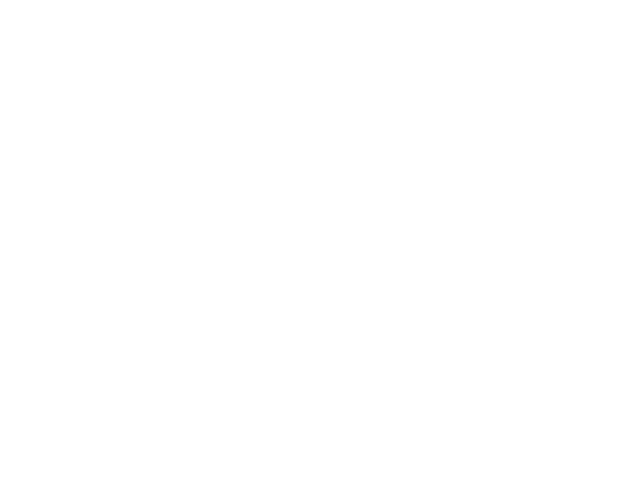

In [51]:
%matplotlib notebook
sns.set_context("notebook", font_scale=1.0,
                rc={"lines.linewidth": 2.5})
fig, ax = plt.subplots()
for m in Bestmodels_X1:
    model =Bestmodels_X1[m]['bestModel'] # select the model
#     y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_validate, model.predict_proba(X1_validate)[:,1])
# Calculate Area under the curve to display on the plot
    auc = roc_auc_score(y_validate,model.predict(X1_validate))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % (m, auc))
# Custom settings for the plot 


plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic X1')
plt.legend(loc="lower right", fontsize ='xx-small')
plt.show()   # Display
plt.savefig('Bestmodels_X1.png', facecolor=fig.get_facecolor(), bbox_inches='tight', xlabelsize=1)

In [52]:
result_X1

{'linear': {'auc': 0.632,
  'precision': 0.819,
  'recall': 0.632,
  'f1score': 0.67},
 'gradient': {'auc': 0.639,
  'precision': 0.788,
  'recall': 0.639,
  'f1score': 0.675},
 'tree': {'auc': 0.56, 'precision': 0.707, 'recall': 0.56, 'f1score': 0.572},
 'svm': {'auc': 0.645, 'precision': 0.852, 'recall': 0.645, 'f1score': 0.689},
 'RandomForest': {'auc': 0.57,
  'precision': 0.936,
  'recall': 0.57,
  'f1score': 0.588},
 'Knn': {'auc': 0.543, 'precision': 0.766, 'recall': 0.543, 'f1score': 0.544},
 'GCP': {'auc': 0.561, 'precision': 0.602, 'recall': 0.561, 'f1score': 0.57}}

### Con variables seleccionadas por Lasso

In [53]:
Bestmodels_X2, result_X2  = grid('X2', -1, X2_train, y_train.values, X2_test, y_test, models, score = 'roc_auc', cv = 5)

********************************************************************************
Model: linear
['EnvironmentSatisfaction' 'Gender' 'JobLevel' 'JobSatisfaction'
 'NumCompaniesWorked' 'OverTime' 'RelationshipSatisfaction'
 'TotalWorkingYears' 'TrainingTimesLastYear' 'WorkLifeBalance'
 'YearsAtCompany' 'YearsInCurrentRole' 'YearsSinceLastPromotion'
 'YearsWithCurrManager' 'cat_BusinessTravel_0' 'cat_BusinessTravel_1'
 'cat_BusinessTravel_2' 'cat_Department_0' 'cat_Department_2'
 'cat_Education_2' 'cat_Education_3' 'cat_Education_4' 'cat_Education_5'
 'cat_EducationField_0' 'cat_EducationField_2' 'cat_EducationField_3'
 'cat_EducationField_4' 'cat_EducationField_5' 'cat_JobInvolvement_1'
 'cat_JobInvolvement_2' 'cat_JobInvolvement_4' 'cat_MaritalStatus_0'
 'cat_MaritalStatus_1' 'cat_StockOptionLevel_0' 'cat_StockOptionLevel_1'
 'cat_StockOptionLevel_3']
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 173 out of 180 | elapsed:    8.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    8.6s finished


Saving model at modelos/X2linear_20200417-1825.sav
El tiempo de seleccion fue: 9.238 s
El error roc_auc de la familia linear es: 0.821
********************************************************************************
********************************************************************************
Model: gradient
['EnvironmentSatisfaction' 'Gender' 'JobLevel' 'JobSatisfaction'
 'NumCompaniesWorked' 'OverTime' 'RelationshipSatisfaction'
 'TotalWorkingYears' 'TrainingTimesLastYear' 'WorkLifeBalance'
 'YearsAtCompany' 'YearsInCurrentRole' 'YearsSinceLastPromotion'
 'YearsWithCurrManager' 'cat_BusinessTravel_0' 'cat_BusinessTravel_1'
 'cat_BusinessTravel_2' 'cat_Department_0' 'cat_Department_2'
 'cat_Education_2' 'cat_Education_3' 'cat_Education_4' 'cat_Education_5'
 'cat_EducationField_0' 'cat_EducationField_2' 'cat_EducationField_3'
 'cat_EducationField_4' 'cat_EducationField_5' 'cat_JobInvolvement_1'
 'cat_JobInvolvement_2' 'cat_JobInvolvement_4' 'cat_MaritalStatus_0'
 'cat_MaritalStatus_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   14.9s finished


Saving model at modelos/X2gradient_20200417-1825.sav
El tiempo de seleccion fue: 15.711 s
El error roc_auc de la familia gradient es: 0.796
********************************************************************************
********************************************************************************
Model: tree
['EnvironmentSatisfaction' 'Gender' 'JobLevel' 'JobSatisfaction'
 'NumCompaniesWorked' 'OverTime' 'RelationshipSatisfaction'
 'TotalWorkingYears' 'TrainingTimesLastYear' 'WorkLifeBalance'
 'YearsAtCompany' 'YearsInCurrentRole' 'YearsSinceLastPromotion'
 'YearsWithCurrManager' 'cat_BusinessTravel_0' 'cat_BusinessTravel_1'
 'cat_BusinessTravel_2' 'cat_Department_0' 'cat_Department_2'
 'cat_Education_2' 'cat_Education_3' 'cat_Education_4' 'cat_Education_5'
 'cat_EducationField_0' 'cat_EducationField_2' 'cat_EducationField_3'
 'cat_EducationField_4' 'cat_EducationField_5' 'cat_JobInvolvement_1'
 'cat_JobInvolvement_2' 'cat_JobInvolvement_4' 'cat_MaritalStatus_0'
 'cat_MaritalStatus

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    4.9s finished
C:\Users\Juan Camilo Ceballos\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Saving model at modelos/X2tree_20200417-1825.sav
El tiempo de seleccion fue: 5.434 s
El error roc_auc de la familia tree es: 0.729
********************************************************************************
********************************************************************************
Model: svm
['EnvironmentSatisfaction' 'Gender' 'JobLevel' 'JobSatisfaction'
 'NumCompaniesWorked' 'OverTime' 'RelationshipSatisfaction'
 'TotalWorkingYears' 'TrainingTimesLastYear' 'WorkLifeBalance'
 'YearsAtCompany' 'YearsInCurrentRole' 'YearsSinceLastPromotion'
 'YearsWithCurrManager' 'cat_BusinessTravel_0' 'cat_BusinessTravel_1'
 'cat_BusinessTravel_2' 'cat_Department_0' 'cat_Department_2'
 'cat_Education_2' 'cat_Education_3' 'cat_Education_4' 'cat_Education_5'
 'cat_EducationField_0' 'cat_EducationField_2' 'cat_EducationField_3'
 'cat_EducationField_4' 'cat_EducationField_5' 'cat_JobInvolvement_1'
 'cat_JobInvolvement_2' 'cat_JobInvolvement_4' 'cat_MaritalStatus_0'
 'cat_MaritalStatus_1' 'cat_S

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.8s finished


Saving model at modelos/X2svm_20200417-1825.sav
El tiempo de seleccion fue: 5.622 s
El error roc_auc de la familia svm es: 0.825
********************************************************************************
********************************************************************************
Model: RandomForest
['EnvironmentSatisfaction' 'Gender' 'JobLevel' 'JobSatisfaction'
 'NumCompaniesWorked' 'OverTime' 'RelationshipSatisfaction'
 'TotalWorkingYears' 'TrainingTimesLastYear' 'WorkLifeBalance'
 'YearsAtCompany' 'YearsInCurrentRole' 'YearsSinceLastPromotion'
 'YearsWithCurrManager' 'cat_BusinessTravel_0' 'cat_BusinessTravel_1'
 'cat_BusinessTravel_2' 'cat_Department_0' 'cat_Department_2'
 'cat_Education_2' 'cat_Education_3' 'cat_Education_4' 'cat_Education_5'
 'cat_EducationField_0' 'cat_EducationField_2' 'cat_EducationField_3'
 'cat_EducationField_4' 'cat_EducationField_5' 'cat_JobInvolvement_1'
 'cat_JobInvolvement_2' 'cat_JobInvolvement_4' 'cat_MaritalStatus_0'
 'cat_MaritalStatus_1'

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   16.1s finished


Saving model at modelos/X2RandomForest_20200417-1826.sav
El tiempo de seleccion fue: 17.324 s
El error roc_auc de la familia RandomForest es: 0.800
********************************************************************************
********************************************************************************
Model: Knn
['EnvironmentSatisfaction' 'Gender' 'JobLevel' 'JobSatisfaction'
 'NumCompaniesWorked' 'OverTime' 'RelationshipSatisfaction'
 'TotalWorkingYears' 'TrainingTimesLastYear' 'WorkLifeBalance'
 'YearsAtCompany' 'YearsInCurrentRole' 'YearsSinceLastPromotion'
 'YearsWithCurrManager' 'cat_BusinessTravel_0' 'cat_BusinessTravel_1'
 'cat_BusinessTravel_2' 'cat_Department_0' 'cat_Department_2'
 'cat_Education_2' 'cat_Education_3' 'cat_Education_4' 'cat_Education_5'
 'cat_EducationField_0' 'cat_EducationField_2' 'cat_EducationField_3'
 'cat_EducationField_4' 'cat_EducationField_5' 'cat_JobInvolvement_1'
 'cat_JobInvolvement_2' 'cat_JobInvolvement_4' 'cat_MaritalStatus_0'
 'cat_Marita

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    5.0s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    5.0s finished


Saving model at modelos/X2Knn_20200417-1826.sav
El tiempo de seleccion fue: 5.692 s
El error roc_auc de la familia Knn es: 0.736
********************************************************************************
********************************************************************************
Model: GCP
['EnvironmentSatisfaction' 'Gender' 'JobLevel' 'JobSatisfaction'
 'NumCompaniesWorked' 'OverTime' 'RelationshipSatisfaction'
 'TotalWorkingYears' 'TrainingTimesLastYear' 'WorkLifeBalance'
 'YearsAtCompany' 'YearsInCurrentRole' 'YearsSinceLastPromotion'
 'YearsWithCurrManager' 'cat_BusinessTravel_0' 'cat_BusinessTravel_1'
 'cat_BusinessTravel_2' 'cat_Department_0' 'cat_Department_2'
 'cat_Education_2' 'cat_Education_3' 'cat_Education_4' 'cat_Education_5'
 'cat_EducationField_0' 'cat_EducationField_2' 'cat_EducationField_3'
 'cat_EducationField_4' 'cat_EducationField_5' 'cat_JobInvolvement_1'
 'cat_JobInvolvement_2' 'cat_JobInvolvement_4' 'cat_MaritalStatus_0'
 'cat_MaritalStatus_1' 'cat_Sto

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.3s finished


Saving model at modelos/X2GCP_20200417-1826.sav
El tiempo de seleccion fue: 6.319 s
El error roc_auc de la familia GCP es: 0.595
********************************************************************************
best model: svm with an error roc_auc of: 0.8251726719862928


<IPython.core.display.Javascript object>


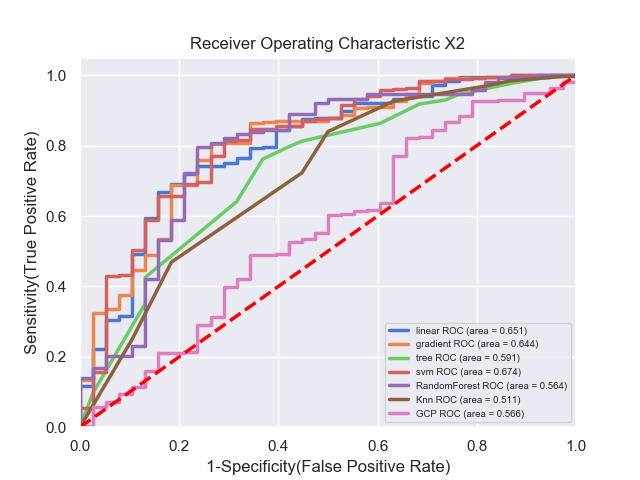

In [54]:
%matplotlib notebook
sns.set_context("notebook", font_scale=1.0,
                rc={"lines.linewidth": 2.5})
fig, ax = plt.subplots()
for m in Bestmodels_X2:
    model =Bestmodels_X2[m]['bestModel'] # select the model
#     y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_validate, model.predict_proba(X2_validate)[:,1])
# Calculate Area under the curve to display on the plot
    auc = roc_auc_score(y_validate,model.predict(X2_validate))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % (m, auc))
# Custom settings for the plot 


plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic X2')
plt.legend(loc="lower right", fontsize ='xx-small')
plt.show()   # Display
plt.savefig('Bestmodels_X1.png', facecolor=fig.get_facecolor(), bbox_inches='tight', xlabelsize=1)

In [55]:
result_X2

{'linear': {'auc': 0.635,
  'precision': 0.755,
  'recall': 0.635,
  'f1score': 0.667},
 'gradient': {'auc': 0.641,
  'precision': 0.807,
  'recall': 0.641,
  'f1score': 0.68},
 'tree': {'auc': 0.608, 'precision': 0.656, 'recall': 0.608, 'f1score': 0.624},
 'svm': {'auc': 0.66, 'precision': 0.789, 'recall': 0.66, 'f1score': 0.697},
 'RandomForest': {'auc': 0.523,
  'precision': 0.93,
  'recall': 0.523,
  'f1score': 0.507},
 'Knn': {'auc': 0.535, 'precision': 0.931, 'recall': 0.535, 'f1score': 0.528},
 'GCP': {'auc': 0.611, 'precision': 0.639, 'recall': 0.611, 'f1score': 0.622}}

### Continua Imbalance learn...
Ver notebook: Parte2: Imbalance Learn